In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

Generate DNN model

In [ ]:
def dnn_model():
  input = Input(shape=(1,))
  x = Dense(32, activation='relu')(input)
  x = Dense(64, activation='relu')(x)
  x = Dense(128, activation='relu')(x)
  output = Dense(1, activation = 'tanh')(x)

  model = Model(input, output, name = 'Regression_model')
  model.compile(loss = 'mse', optimizer = 'adam', metrics = ['r2_score'])

  return model

In [ ]:
model = dnn_model()
model.summary()

Model: "Regression_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

Polynomial function

In [ ]:
def f(x):
  return 5*x**3 -8*x**2 -7*x + 1

Generate training samples

In [ ]:
import numpy as np

x = np.linspace(-20, 20, 1000)
y = f(x)
print(x[:10])
print(y[:10])

[-20.         -19.95995996 -19.91991992 -19.87987988 -19.83983984
 -19.7997998  -19.75975976 -19.71971972 -19.67967968 -19.63963964]
[-43059.         -42806.72069335 -42555.42703508 -42305.11709943
 -42055.78896063 -41807.44069291 -41560.07037048 -41313.67606759
 -41068.25585846 -40823.80781731]


normalize the training data

In [ ]:
x_min = np.min(x)
y_min = np.min(y)
x_max = np.max(x)
y_max = np.max(y)

x = 2 * ((x - x_min) / (x_max - x_min)) - 1
y = 2 * ((y - y_min) / (y_max - y_min)) - 1

print(x[:10])
print(y[:10])

[-1.         -0.997998   -0.995996   -0.99399399 -0.99199199 -0.98998999
 -0.98798799 -0.98598599 -0.98398398 -0.98198198]
[-1.         -0.99367087 -0.98736646 -0.98108673 -0.97483163 -0.96860112
 -0.96239514 -0.95621365 -0.95005659 -0.94392393]


Split data

In [ ]:
from sklearn.model_selection import train_test_split

train_x, tv_x, train_y, tv_y = train_test_split(x, y, test_size = 0.10, random_state=42)
test_x, val_x, test_y, val_y = train_test_split(tv_x, tv_y, test_size = 0.5, random_state = 42)

Train Model

In [ ]:
history = model.fit(train_x, train_y, validation_data = (val_x, val_y), epochs = 10, batch_size = 4)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0521 - r2_score: 0.6809 - val_loss: 0.0048 - val_r2_score: 0.9616
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053 - r2_score: 0.9644 - val_loss: 0.0014 - val_r2_score: 0.9886
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023 - r2_score: 0.9844 - val_loss: 7.4593e-04 - val_r2_score: 0.9941
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010 - r2_score: 0.9923 - val_loss: 4.4127e-04 - val_r2_score: 0.9965
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013 - r2_score: 0.9910 - val_loss: 3.6939e-04 - val_r2_score: 0.9971
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6104e-04 - r2_score: 0.9948 - val_loss: 7.1196e-04 - val_r2_score: 0.9943
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4994e-04 - r2_score: 0.9946 - val_loss: 0.0014 - val_r2_score: 0.9888
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.3228e-04 - r2_scor

Display training accuracy vs validation accuracy

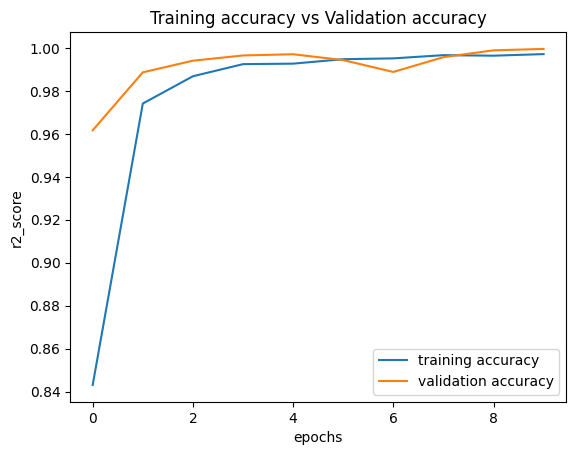

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['r2_score'], label = 'training accuracy')
plt.plot(history.history['val_r2_score'], label = 'validation accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('r2_score')
plt.legend()
plt.show()

Display Training loss vs validation loss

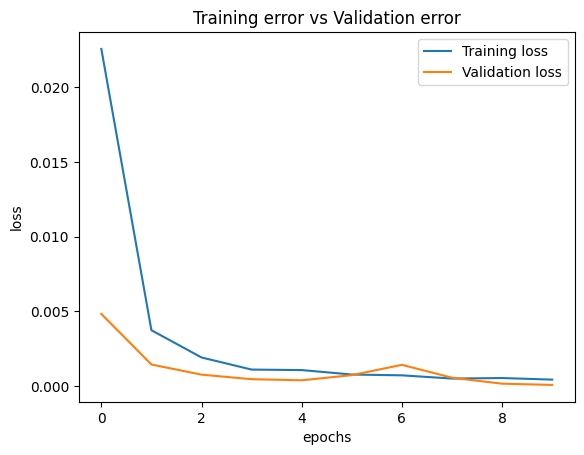

In [ ]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Training error vs Validation error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Test data for prediction

In [ ]:
y_pred = model.predict(test_x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [ ]:
model.evaluate(test_x, test_y)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.8857e-04 - r2_score: 0.9982 


[0.00034449956729076803, 0.997851550579071]

De normalization

In [ ]:
test_x = ((test_x + 1) * (x_max - x_min) / 2) + x_min
test_y = ((test_y + 1) * (y_max - y_min) / 2) + y_min
y_pred = ((y_pred + 1) * (y_max - y_min) / 2) + y_min

display prediction accuracy vs test data

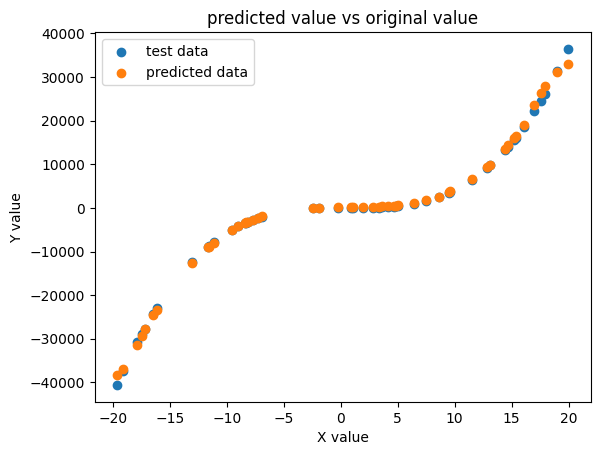

In [ ]:
plt.scatter(test_x, test_y, label = 'test data')
plt.scatter(test_x, y_pred, label = 'predicted data')
plt.title('predicted value vs original value')
plt.xlabel('X value')
plt.ylabel('Y value')
plt.legend()
plt.show()